**Prática de Realce e detecção de borda**

Exercícios retirados de:
http://homepages.inf.ed.ac.uk/rbf/HIPR2/featops.htm



In [56]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

1) Aplique os filtros  Sobel e Roberts nas imagens abaixo. Mostre, para o caso do Sobel, uma imagem representando a derivada em x e outra imagem representando a derivada em y

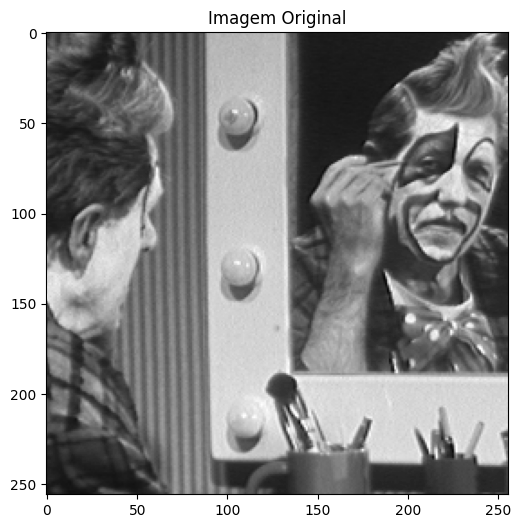

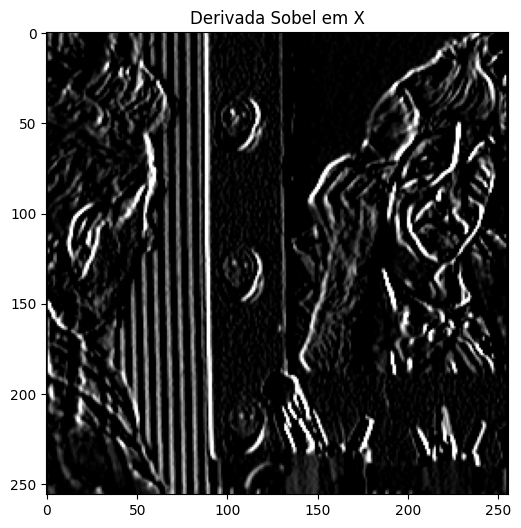

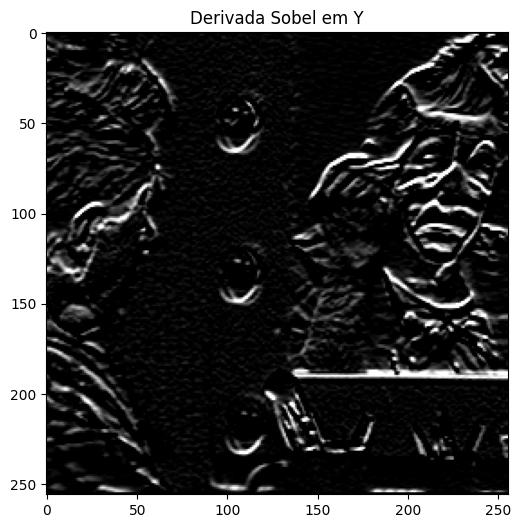

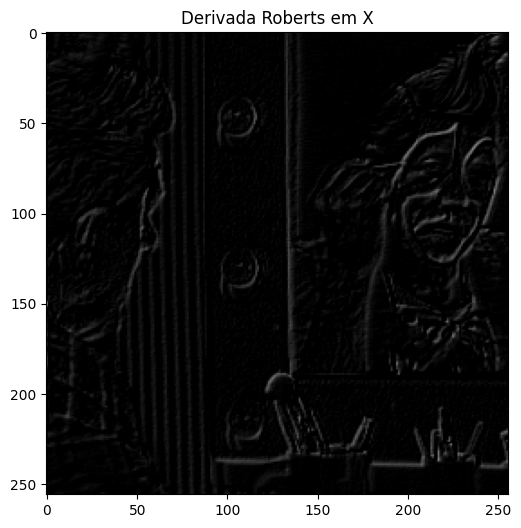

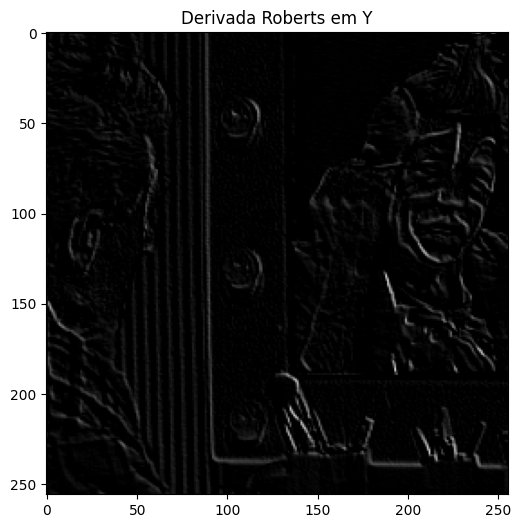

In [1]:
# code here
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
img1 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)

# Mostrar a imagem original
plt.figure(figsize=(6,6))
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Original')
plt.show()

# Função para aplicar convolução com uma máscara
def apply_filter(img, mask):
    return cv2.filter2D(img, -1, mask)

# Máscaras Sobel
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Aplicar Sobel nas direções x e y
sobel_x_img = apply_filter(img1, sobel_x)
sobel_y_img = apply_filter(img1, sobel_y)

# Mostrar a derivada de Sobel em x
plt.figure(figsize=(6,6))
plt.imshow(sobel_x_img, cmap='gray', vmin=0, vmax=255)
plt.title('Derivada Sobel em X')
plt.show()

# Mostrar a derivada de Sobel em y
plt.figure(figsize=(6,6))
plt.imshow(sobel_y_img, cmap='gray', vmin=0, vmax=255)
plt.title('Derivada Sobel em Y')
plt.show()

# Máscaras Roberts
roberts_x = np.array([[1, 0], [0, -1]])
roberts_y = np.array([[0, 1], [-1, 0]])

# Aplicar Roberts nas direções x e y
roberts_x_img = apply_filter(img1, roberts_x)
roberts_y_img = apply_filter(img1, roberts_y)

# Mostrar a derivada de Roberts em x
plt.figure(figsize=(6,6))
plt.imshow(roberts_x_img, cmap='gray', vmin=0, vmax=255)
plt.title('Derivada Roberts em X')
plt.show()

# Mostrar a derivada de Roberts em y
plt.figure(figsize=(6,6))
plt.imshow(roberts_y_img, cmap='gray', vmin=0, vmax=255)
plt.title('Derivada Roberts em Y')
plt.show()

2) Utilizando a imagem do exercício anterior, realce as bordas utilizando (a) Filtro Laplaciano. (b) Unsharp masking. (c) Highboost filtering (escolher um k). (d) K <1 para atenuar

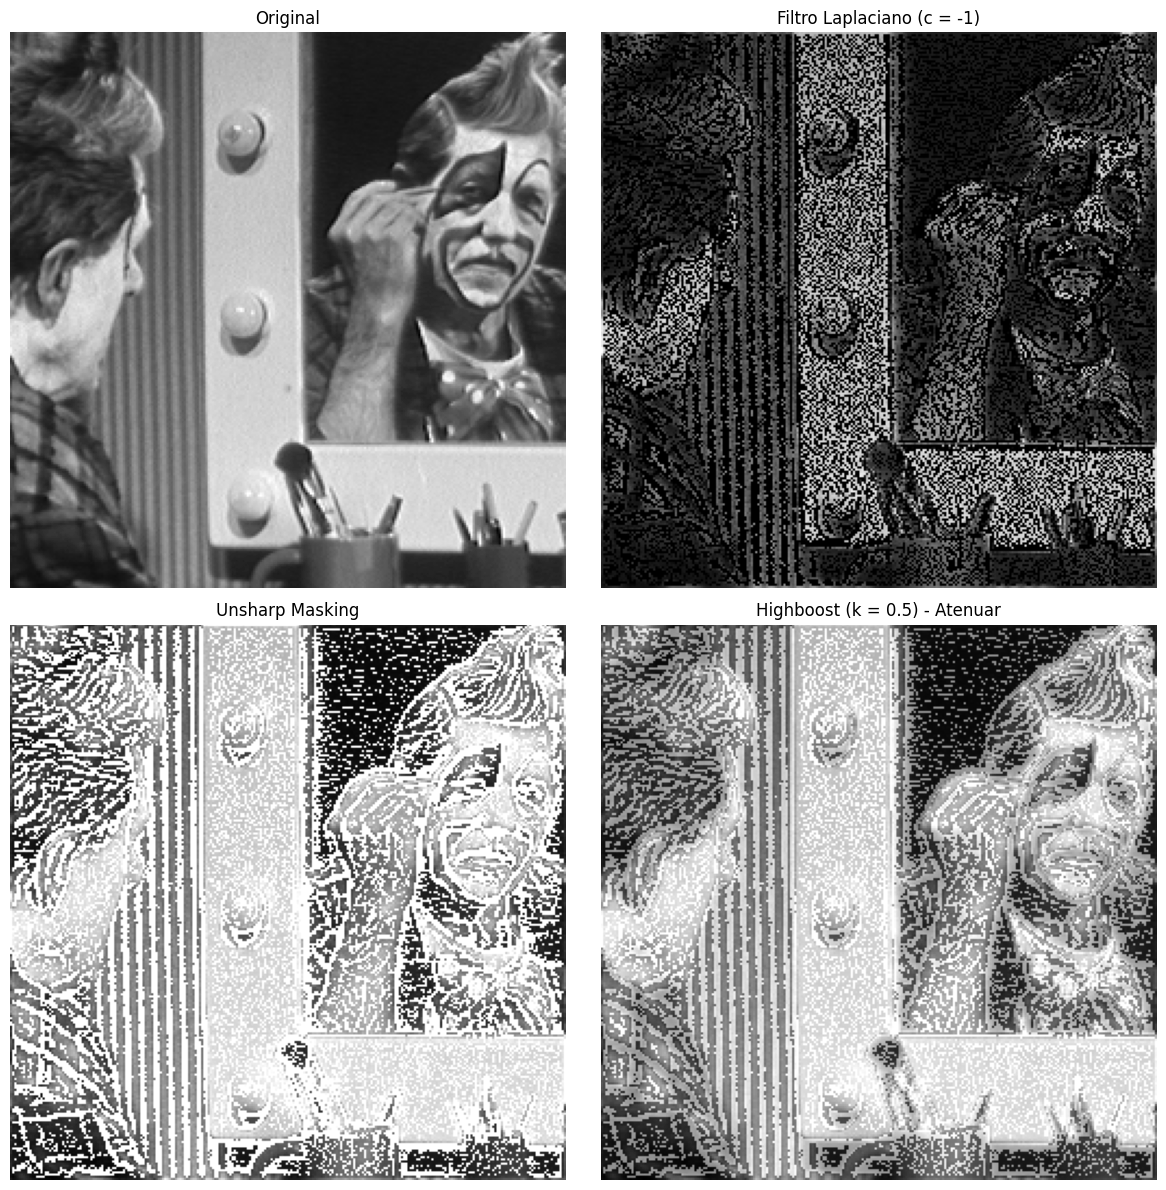

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def laplacian_filter(img, c=-1):
    kernel = np.array([[0, 1, 0],
                       [1, -4, 1],
                       [0, 1, 0]])
    output = np.zeros_like(img)

    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
            region = img[i-1:i+2, j-1:j+2]
            output[i, j] = np.sum(kernel * region)

    laplacian_image = img + c * output
    laplacian_image = np.clip(laplacian_image, 0, 255)
    
    return laplacian_image.astype(np.uint8)

def unsharp_masking(img, sigma=1.0, strength=1.5):
    kernel_size = int(2 * np.ceil(2 * sigma) + 1)
    blurred = gaussian_blur(img, kernel_size, sigma)

    return np.clip(img + strength * (img - blurred), 0, 255).astype(np.uint8)

def highboost_filter(img, k=2.0, sigma=1.0):
    kernel_size = int(2 * np.ceil(2 * sigma) + 1)
    blurred = gaussian_blur(img, kernel_size, sigma)

    return np.clip(img + k * (img - blurred), 0, 255).astype(np.uint8)

def gaussian_blur(img, kernel_size, sigma):
    ax = np.linspace(-(kernel_size // 2), kernel_size // 2, kernel_size)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sigma))
    kernel = np.outer(gauss, gauss)
    kernel = kernel / np.sum(kernel)

    output = np.zeros_like(img)
    pad_size = kernel_size // 2
    padded_img = np.pad(img, pad_size, mode='constant', constant_values=0)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded_img[i:i+kernel_size, j:j+kernel_size]
            output[i, j] = np.sum(region * kernel)
    
    return output

img = Image.open('cln1.png').convert('L')
img_array = np.array(img)

laplacian_c_negative = laplacian_filter(img_array, c=-1)
unsharp_img = unsharp_masking(img_array, sigma=1.0, strength=1.5)
highboost_img = highboost_filter(img_array, k=2.0, sigma=1.0)
highboost_atenuado = highboost_filter(img_array, k=0.5, sigma=1.0)

plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.title('Original')
plt.imshow(img_array, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Filtro Laplaciano (c = -1)')
plt.imshow(laplacian_c_negative, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Unsharp Masking')
plt.imshow(unsharp_img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Highboost (k = 2.0)')
plt.imshow(highboost_img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Highboost (k = 0.5) - Atenuar')
plt.imshow(highboost_atenuado, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

3) Aplique o operador Sobel imagem original abaixo e obtenha as outras imagens conforme descrição. We can see that the intensity of many pixels on the surface is as high as along the actual edges. One reason is that the output of many edge pixels is greater than the maximum pixel value and therefore they are `cut off' at 255. To avoid this overflow we scale the range image by a factor 0.25 prior to the edge detection and then normalize the output, as can be seen in (c)

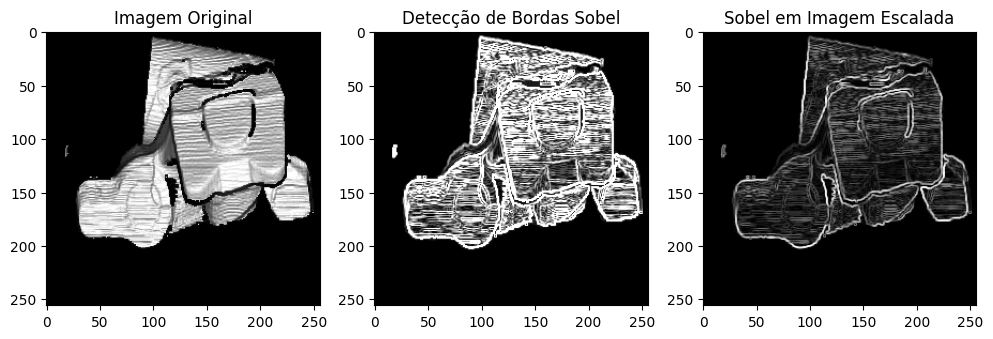

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Função para aplicar o operador Sobel manualmente
def sobel_operator(image):
    # Definir os kernels de Sobel (horizontal e vertical)
    sobel_x = np.array([[-1, 0, 1], 
                        [-2, 0, 2], 
                        [-1, 0, 1]])

    sobel_y = np.array([[-1, -2, -1], 
                        [0, 0, 0], 
                        [1, 2, 1]])

    # Inicializar as imagens gradientes vazias
    gradient_x = np.zeros_like(image, dtype=np.float64)
    gradient_y = np.zeros_like(image, dtype=np.float64)

    # Aplicar os kernels Sobel manualmente (convolução)
    rows, cols = image.shape
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            region = image[i-1:i+2, j-1:j+2]
            gx = np.sum(region * sobel_x)
            gy = np.sum(region * sobel_y)
            gradient_x[i, j] = gx
            gradient_y[i, j] = gy

    # Calcular a magnitude do gradiente
    sobel_magnitude = np.hypot(gradient_x, gradient_y)

    # Normalizar a magnitude do gradiente para a faixa [0, 255]
    sobel_magnitude = np.clip(sobel_magnitude, 0, 255)
    sobel_magnitude = (sobel_magnitude / np.max(sobel_magnitude)) * 255

    return sobel_magnitude.astype(np.uint8)

#img1 = cv2.imread("ren1.png", cv2.IMREAD_GRAYSCALE)

# plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

# Carregar a imagem original usando OpenCV
img = cv2.imread("ren1.png", cv2.IMREAD_GRAYSCALE)

# Aplicar o operador Sobel manualmente
sobel_img = sobel_operator(img)

# Escalar a imagem original por um fator de 0.25
scaled_img = (img * 0.25).astype(np.uint8)

# Aplicar o operador Sobel na imagem escalada
sobel_scaled_img = sobel_operator(scaled_img)

# Mostrar os resultados
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagem Original')

plt.subplot(1, 3, 2)
plt.imshow(sobel_img, cmap='gray')
plt.title('Detecção de Bordas Sobel')

plt.subplot(1, 3, 3)
plt.imshow(sobel_scaled_img, cmap='gray')
plt.title('Sobel em Imagem Escalada')

plt.show()


4) Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

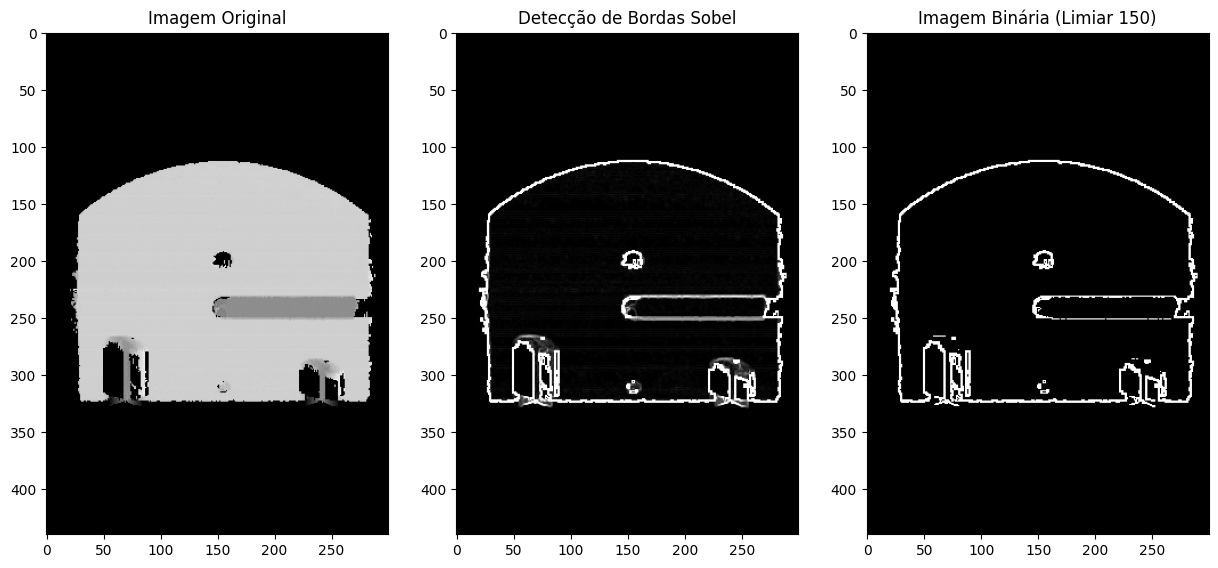

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a nova imagem enviada
img_2 = cv2.imread("ufo2.png", cv2.IMREAD_GRAYSCALE)
imagem_original = img_2

# Função para aplicar o operador Sobel manualmente
def sobel_operator(image):
    sobel_x = np.array([[-1, 0, 1], 
                        [-2, 0, 2], 
                        [-1, 0, 1]])

    sobel_y = np.array([[-1, -2, -1], 
                        [0, 0, 0], 
                        [1, 2, 1]])

    gradient_x = np.zeros_like(image, dtype=np.float64)
    gradient_y = np.zeros_like(image, dtype=np.float64)

    rows, cols = image.shape
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            region = image[i-1:i+2, j-1:j+2]
            gx = np.sum(region * sobel_x)
            gy = np.sum(region * sobel_y)
            gradient_x[i, j] = gx
            gradient_y[i, j] = gy

    sobel_magnitude = np.hypot(gradient_x, gradient_y)
    sobel_magnitude = np.clip(sobel_magnitude, 0, 255)
    sobel_magnitude = (sobel_magnitude / np.max(sobel_magnitude)) * 255

    return sobel_magnitude.astype(np.uint8)

# Aplicar o operador Sobel manualmente na nova imagem
sobel_img_2 = sobel_operator(img_2)

# Aplicar limiarização (threshold) com valor 150
_, binary_img = cv2.threshold(sobel_img_2, 150, 255, cv2.THRESH_BINARY)

# Mostrar os resultados, incluindo a imagem original
plt.figure(figsize=(15, 8))

plt.subplot(1, 3, 1)
plt.imshow(imagem_original, cmap='gray')
plt.title('Imagem Original')

plt.subplot(1, 3, 2)
plt.imshow(sobel_img_2, cmap='gray')
plt.title('Detecção de Bordas Sobel')

plt.subplot(1, 3, 3)
plt.imshow(binary_img, cmap='gray')
plt.title('Imagem Binária (Limiar 150)')

plt.show()

5) Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

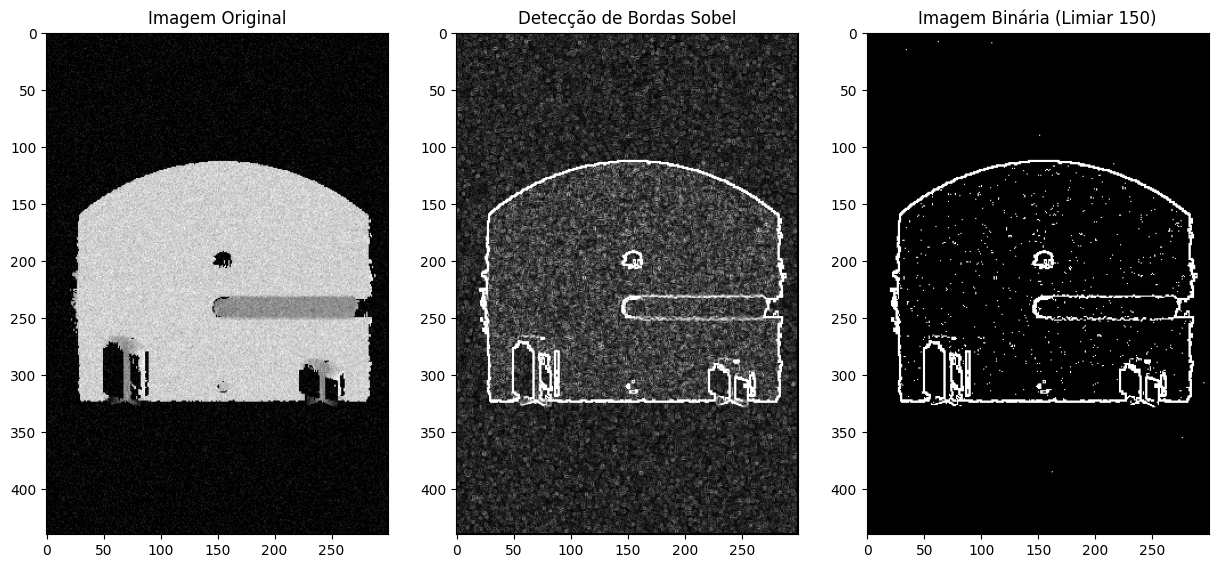

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a nova imagem enviada
img_2 = cv2.imread("ufo2noi2.png", cv2.IMREAD_GRAYSCALE)
imagem_original = img_2

# Função para aplicar o operador Sobel manualmente
def sobel_operator(image):
    sobel_x = np.array([[-1, 0, 1], 
                        [-2, 0, 2], 
                        [-1, 0, 1]])

    sobel_y = np.array([[-1, -2, -1], 
                        [0, 0, 0], 
                        [1, 2, 1]])

    gradient_x = np.zeros_like(image, dtype=np.float64)
    gradient_y = np.zeros_like(image, dtype=np.float64)

    rows, cols = image.shape
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            region = image[i-1:i+2, j-1:j+2]
            gx = np.sum(region * sobel_x)
            gy = np.sum(region * sobel_y)
            gradient_x[i, j] = gx
            gradient_y[i, j] = gy

    sobel_magnitude = np.hypot(gradient_x, gradient_y)
    sobel_magnitude = np.clip(sobel_magnitude, 0, 255)
    sobel_magnitude = (sobel_magnitude / np.max(sobel_magnitude)) * 255

    return sobel_magnitude.astype(np.uint8)

# Aplicar o operador Sobel manualmente na nova imagem
sobel_img_2 = sobel_operator(img_2)

# Aplicar limiarização (threshold) com valor 150
_, binary_img = cv2.threshold(sobel_img_2, 150, 255, cv2.THRESH_BINARY)

# Mostrar os resultados, incluindo a imagem original
plt.figure(figsize=(15, 8))

plt.subplot(1, 3, 1)
plt.imshow(imagem_original, cmap='gray')
plt.title('Imagem Original')

plt.subplot(1, 3, 2)
plt.imshow(sobel_img_2, cmap='gray')
plt.title('Detecção de Bordas Sobel')

plt.subplot(1, 3, 3)
plt.imshow(binary_img, cmap='gray')
plt.title('Imagem Binária (Limiar 150)')

plt.show()